In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [26]:
start_date = '19-01-01'
end_date = '2022-01-01'

def data_processing(df):
    df['DATE'] = pd.to_datetime(df['DATE'])
    #set as index
    df = df.set_index('DATE',inplace=False,drop=True)
    #slice into interval range
    df = df[start_date:end_date]
    #rename columns
    df = df.rename(columns={df.columns[0]:"data"},inplace=False)
    #drop non-numeric values, convert object type
    df['data'] = df[df['data'].apply(lambda x: x!=".")].astype(np.float64)
    #remove any nan
    df = df.dropna(axis=0)
    #normalize
    df['data'] = df['data']/df.iloc[0,0]
    df = df.reset_index()
    return df

In [27]:
#load data
median_personal_income = pd.read_csv('data/MEPAINUSA646N.csv')
median_household_sale = pd.read_csv('data/MSPUS.csv')
nasdaq = pd.read_csv('data/NASDAQCOM.csv')
sp500 = pd.read_csv('data/SP500.csv')
sp500 = sp500[['Date','Close']]
sp500 = sp500.rename(columns={"Date":"DATE"})

#process data
median_personal_income = data_processing(median_personal_income)
median_household_sale = data_processing(median_household_sale)
nasdaq = data_processing(nasdaq)
sp500 = data_processing(sp500)

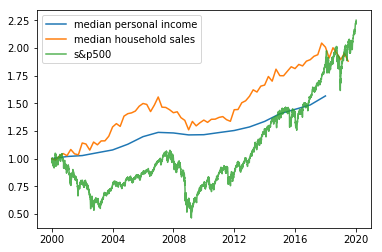

In [28]:
plt.plot(median_personal_income['DATE'],median_personal_income['data'],label='median personal income')
plt.plot(median_household_sale['DATE'],median_household_sale['data'],label='median household sales')
plt.plot(sp500['DATE'],sp500['data'],label='s&p500',alpha=0.8)
plt.legend()

In [13]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool

In [17]:

p = figure(title = "Asset Growth in US", plot_height=500, plot_width=500,x_axis_type='datetime')

p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Normalized Growth'

#p.line('DATE', 'data',
 #        line_alpha=0.8, line_width=2, line_color='red',source=ColumnDataSource(nasdaq),legend_label='NASDAQ Composite Index')

p.line('DATE', 'data',
         line_alpha=0.8, line_width=2,line_color='blue',source=ColumnDataSource(median_personal_income),legend_label='Median Personal Income')

p.line('DATE', 'data',
         line_alpha=0.8, line_width=2, line_color='green',source=ColumnDataSource(median_household_sale),legend_label='Median Household Price')

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file('plot.html')

show(p)